# Makie Tutorial

Makie is the name of the whole plotting ecosystem and `Makie.jl` is the main package that describes how plots work. To actually render and save plots, we need a backend that knows how to translate plots into images or vector graphics. For example you can choose:

`CairoMakie.jl` if you want to render vector graphics or high quality 2D images and don't need interactivity or true 3D rendering.

`GLMakie.jl` if you need interactive windows and true 3D rendering but no vector output.

In [ ]:
using Pkg
Pkg.add("GLMakie")

In [1]:
using GLMakie

### Most basic Plots

Let's start with what is probably the most basic thing - plotting points and lines.

Note: Generating the first plot may take some time. 

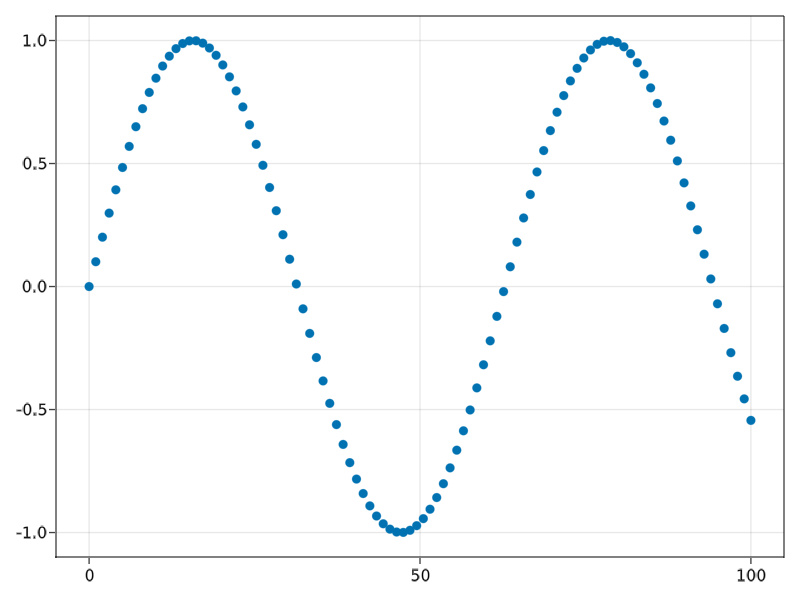

In [2]:
xs = range(0, 100, length=100)
ys = sin.(0.1 .* xs)

scatter(xs, ys)

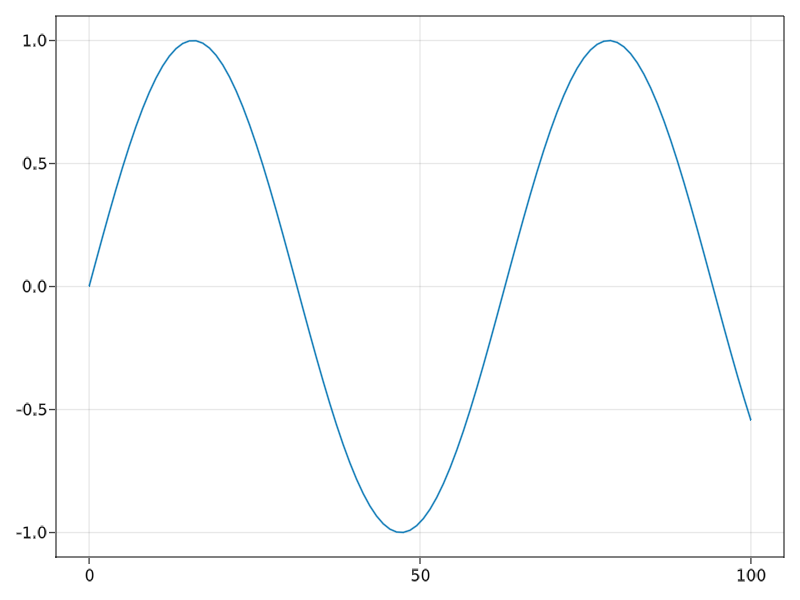

In [3]:
lines(xs, ys)

### Adjusting your plots

To adjust the look of your plot you want to modify "attributes". You can do so via keyword arguments. 

Attributes can often take many different values. For example, `color` can be a `Symbol` (e.g. `:red`), any color type from Colors (e.g. `RGBA(0.3, 0.4, 0.8, 0.3)` or `HSV(120, 0.8, 0.9)`), a `Vector` of either (applying to each point) or a tuple `(color, alpha)`.

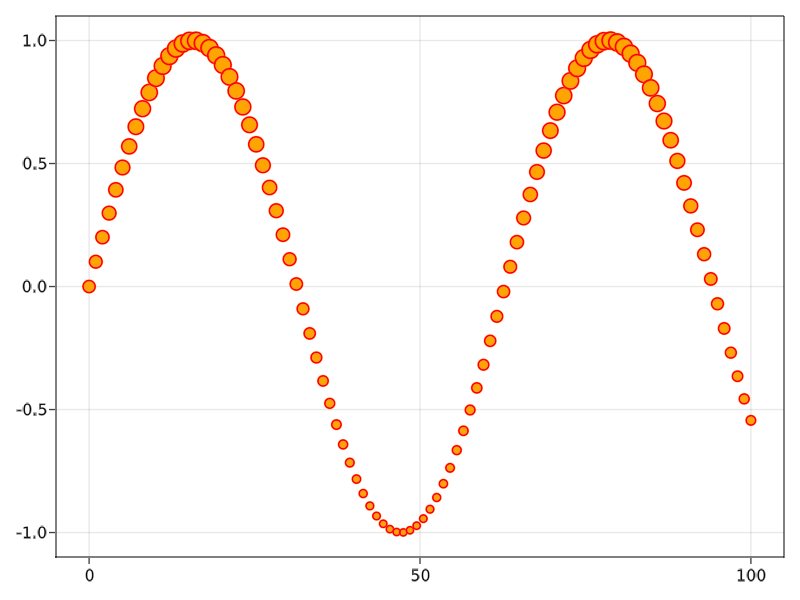

In [4]:
scatter(xs, ys, color = :orange, strokecolor = :red, strokewidth = 2.0, markersize = 10 .+ 5 .* ys)

### Figure, Axis, Plot

A Makie ~~plot~~ visualization is built up from three objects - a `Figure`, layoutables (e.g. `Axis`) and plots.

* The `Figure` is an outer container which holds layouting information and all the constituents of a visualization.
* Layoutables are objects that can be places in a layout, such as an `Axis`, a `Slider` or a `Colorbar`.
* Plots are objects that need to be drawn, for example scattered markers, lines, meshes, etc. Note that everything you see in Makie is actually made up of plot objects.

[ Info: Figure
[ Info: Axis
[ Info: Scatter{Tuple{Vector{Point{2, Float32}}}}


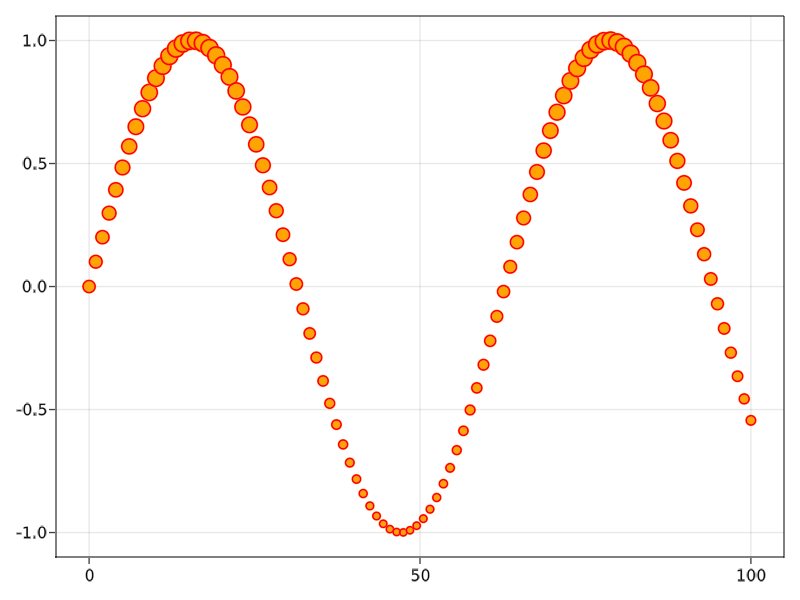

In [5]:
fig, axis, plot = scatter(xs, ys, color = :orange, strokecolor = :red, strokewidth = 2.0, markersize = 10 .+ 5 .* ys)
@info typeof(fig)
@info typeof(axis)
@info typeof(plot)
fig

### Saving a plot

Now that we know figures exist we can save plots:

Note that for vector graphics (pdf, svg) you'll need to use CairoMakie. If you have both loaded you can switch via `GLMakie.activate!()` and `CairoMakie.activate!()`.

In [6]:
save("./test.png", fig)

GLMakie.Screen(...)

### Creating our own

In more complex plots you often want to define your own figure, layoutables and plots.

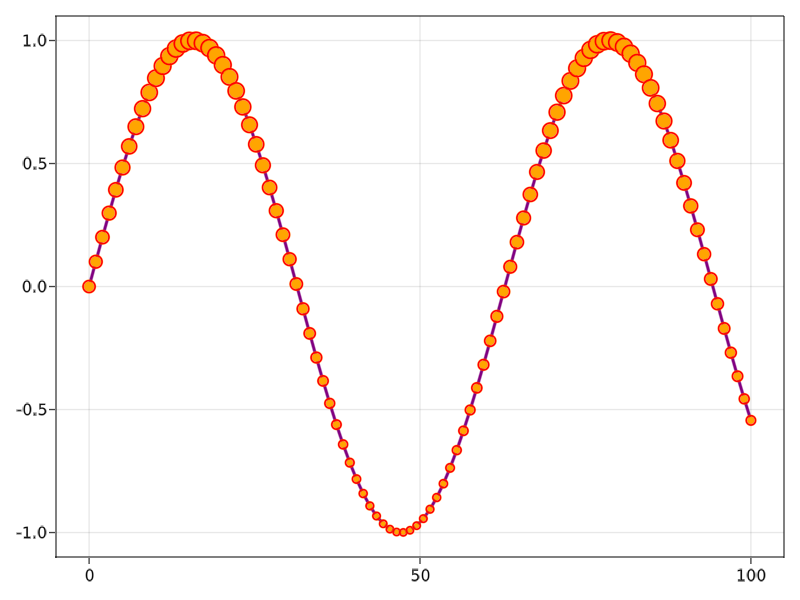

In [7]:
fig = Figure()
axis = Axis(fig[1, 1])
lineplot = lines!(axis, xs, ys, color = :purple, linewidth = 3)
scatterplot = scatter!(axis, xs, ys, color = :orange, strokecolor = :red, strokewidth = 2.0, markersize = 10 .+ 5 .* ys)

fig

A figure contains layouting information. When adding a layoutable, e.g. an `Axis` to a figure, you can specify its position in the grid-layout via the indices to the figure. For example, we can put two axes next to each other like this:

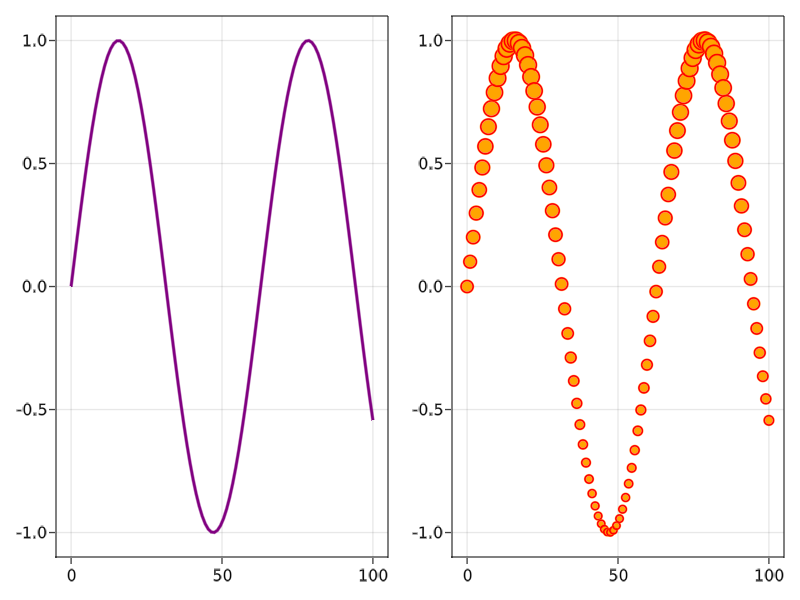

In [8]:
fig = Figure()
left = Axis(fig[1, 1])
right = Axis(fig[1, 2])
lineplot = lines!(left, xs, ys, color = :purple, linewidth = 3)
scatterplot = scatter!(right, xs, ys, color = :orange, strokecolor = :red, strokewidth = 2.0, markersize = 10 .+ 5 .* ys)

fig

To plot to a specific axis we use the "mutating" plotting functions, i.e. `scatter!` rather than `scatter` and supply the relevant axis as the first argument. Note that you can omit the axis as well. In this case you will plot to the last created axis.

### More about attributes

All the attributes are contained in plot objects. If we want to we can change them after creating our visualization as well.

In [9]:
scatterplot.attributes

Attributes with 30 entries:
  ambient => Float32[0.55, 0.55, 0.55]
  color => orange
  colormap => viridis
  cycle => [:color]
  diffuse => Float32[0.4, 0.4, 0.4]
  distancefield => nothing
  fxaa => false
  glowcolor => (:black, 0.0)
  glowwidth => 0.0
  inspectable => true
  lightposition => eyeposition
  linewidth => 1
  marker => Circle
  marker_offset => Vec{2, Float32}[[-5.0, -5.0], [-5.2521, -5.2521], [-5.50162, -5.50162], [-5.74603, -5.74603], [-5.98284, -5.98284], [-6.20963, -6.20963], [-6.42409, -6.42409], [-6.62402, -6.62402], [-6.80741, -6.80741], [-6.97236, -6.97236]  …  [-5.81925, -5.81925], [-5.5769, -5.5769], [-5.32867, -5.32867], [-5.07708, -5.07708], [-4.82472, -4.82472], [-4.57413, -4.57413], [-4.32789, -4.32789], [-4.0885, -4.0885], [-3.85841, -3.85841], [-3.63995, -3.63995]]
  markersize => [10.0, 10.5042, 11.0032, 11.4921, 11.9657, 12.4193, 12.8482, 13.248, 13.6148, 13.9447  …  11.6385, 11.1538, 10.6573, 10.1542, 9.64943, 9.14827, 8.65578, 8.17701, 7.71681, 7.2798

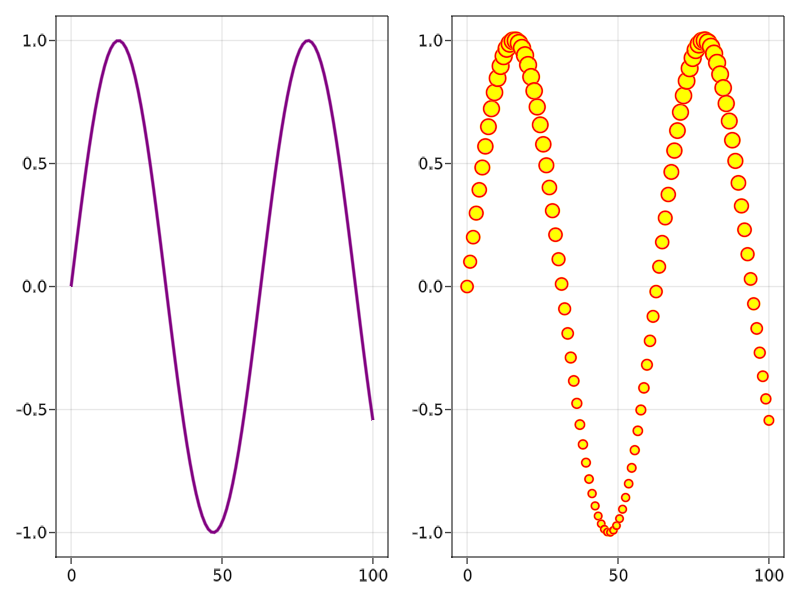

In [10]:
# There is a shorthand for adjusting attributes:
scatterplot.color = :yellow

fig

Note that this also applies to `Axis`. If you want to add, for example, an xlabel you can do so by adjusting the relevant attribute.

In [11]:
?Axis

search: Axis Axis3 axis Axis3D axis3d axis3d! AxisAspect axislegend OldAxis



Axis has the following attributes:

`alignmode`
Default: `Inside()`
The align mode of the axis in its parent GridLayout.

`aspect`
Default: `nothing`
The forced aspect ratio of the axis. `nothing` leaves the axis unconstrained, `DataAspect()` forces the same ratio as the ratio in data limits between x and y axis, `AxisAspect(ratio)` sets a manual ratio.

`autolimitaspect`
Default: `nothing`
Constrains the data aspect ratio (`nothing` leaves the ratio unconstrained).

`backgroundcolor`
Default: `:white`
The background color of the axis.

`bottomspinecolor`
Default: `:black`
The color of the bottom axis spine.

`bottomspinevisible`
Default: `true`
Controls if the bottom axis spine is visible.

`flip_ylabel`
Default: `false`
Controls if the ylabel's rotation is flipped.

`halign`
Default: `:center`
The horizontal alignment of the axis within its suggested bounding box.

`height`
Default: `nothing`
The height of the axis.

`leftspinecolor`
Default: `:black`
The color of the left axis spine.

`leftspinevisible`
Default: `true`
Controls if the left axis spine is visible.

`limits`
Default: `(nothing, nothing)`
The limits that the user has manually set. They are reinstated when calling `reset_limits!` and are set to nothing by `autolimits!`. Can be either a tuple (xlow, xhigh, ylow, high) or a tuple (nothing*or*xlims, nothing*or*ylims). Are set by `xlims!`, `ylims!` and `limits!`.

`palette`
Default: `if scene !== nothing && haskey(scene.attributes, :palette)     deepcopy(scene.palette) else     Attributes() end`
Attributes with one palette per key, for example `color = [:red, :green, :blue]`

`panbutton`
Default: `Makie.Mouse.right`
The button for panning.

`rightspinecolor`
Default: `:black`
The color of the right axis spine.

`rightspinevisible`
Default: `true`
Controls if the right axis spine is visible.

`spinewidth`
Default: `1.0`
The width of the axis spines.

`tellheight`
Default: `true`
Controls if the parent layout can adjust to this element's height

`tellwidth`
Default: `true`
Controls if the parent layout can adjust to this element's width

`title`
Default: `""`
The axis title string.

`titlealign`
Default: `:center`
The horizontal alignment of the title.

`titlecolor`
Default: `lift_parent_attribute(scene, :textcolor, :black)`
The color of the title

`titlefont`
Default: `lift_parent_attribute(scene, :font, "DejaVu Sans")`
The font family of the title.

`titlegap`
Default: `4.0`
The gap between axis and title.

`titlesize`
Default: `lift_parent_attribute(scene, :fontsize, 16.0f0)`
The title's font size.

`titlevisible`
Default: `true`
Controls if the title is visible.

`topspinecolor`
Default: `:black`
The color of the top axis spine.

`topspinevisible`
Default: `true`
Controls if the top axis spine is visible.

`valign`
Default: `:center`
The vertical alignment of the axis within its suggested bounding box.

`width`
Default: `nothing`
The width of the axis.

`xautolimitmargin`
Default: `(0.05f0, 0.05f0)`
The relative margins added to the autolimits in x direction.

`xaxisposition`
Default: `:bottom`
The position of the x axis (`:bottom` or `:top`).

`xgridcolor`
Default: `RGBAf0(0, 0, 0, 0.12)`
The color of the x grid lines.

`xgridstyle`
Default: `nothing`
The linestyle of the x grid lines.

`xgridvisible`
Default: `true`
Controls if the x grid lines are visible.

`xgridwidth`
Default: `1.0`
The width of the x grid lines.

`xlabel`
Default: `""`
The xlabel string.

`xlabelcolor`
Default: `lift_parent_attribute(scene, :textcolor, :black)`
The color of the xlabel.

`xlabelfont`
Default: `lift_parent_attribute(scene, :font, "DejaVu Sans")`
The font family of the xlabel.

`xlabelpadding`
Default: `3.0`
The padding between the xlabel and the ticks or axis.

`xlabelsize`
Default: `lift_parent_attribute(scene, :fontsize, 16.0f0)`
The font size of the xlabel.

`xlabelvisible`
Default: `true`
Controls if the xlabel is visible.

`xminorgridcolor`
Default: `RGBAf0(0, 0, 0, 0.05)`
The color of the x minor grid lines.

`xminorgridstyle`
Default: `nothing`
The linestyle of the x minor grid lines.

`xminorgridvisible`
Default: `false`
Controls if the x minor grid lines are visible.

`xminorgridwidth`
Default: `1.0`
The width of the x minor grid lines.

`xminortickalign`
Default: `0.0`
The alignment of x minor ticks on the axis spine

`xminortickcolor`
Default: `:black`
The tick color of x minor ticks

`xminorticks`
Default: `IntervalsBetween(2)`
The tick locator for the x minor ticks

`xminorticksize`
Default: `4.0`
The tick size of x minor ticks

`xminorticksvisible`
Default: `false`
Controls if minor ticks on the x axis are visible

`xminortickwidth`
Default: `1.0`
The tick width of x minor ticks

`xpankey`
Default: `Makie.Keyboard.x`
The key for limiting panning to the x direction.

`xpanlock`
Default: `false`
Locks interactive panning in the x direction.

`xrectzoom`
Default: `true`
Controls if rectangle zooming affects the x dimension.

`xreversed`
Default: `false`
Controls if the x axis goes rightwards (false) or leftwards (true)

`xscale`
Default: `identity`
The x axis scale

`xtickalign`
Default: `0.0`
The alignment of the xtick marks relative to the axis spine (0 = out, 1 = in).

`xtickcolor`
Default: `RGBf0(0, 0, 0)`
The color of the xtick marks.

`xtickformat`
Default: `Makie.automatic`
Format for xticks.

`xticklabelalign`
Default: `Makie.automatic`
The horizontal and vertical alignment of the xticklabels.

`xticklabelcolor`
Default: `lift_parent_attribute(scene, :textcolor, :black)`
The color of xticklabels.

`xticklabelfont`
Default: `lift_parent_attribute(scene, :font, "DejaVu Sans")`
The font family of the xticklabels.

`xticklabelpad`
Default: `2.0`
The space between xticks and xticklabels.

`xticklabelrotation`
Default: `0.0`
The counterclockwise rotation of the xticklabels in radians.

`xticklabelsize`
Default: `lift_parent_attribute(scene, :fontsize, 16.0f0)`
The font size of the xticklabels.

`xticklabelspace`
Default: `Makie.automatic`
The space reserved for the xticklabels.

`xticklabelsvisible`
Default: `true`
Controls if the xticklabels are visible.

`xticks`
Default: `Makie.automatic`
The xticks.

`xticksize`
Default: `6.0`
The size of the xtick marks.

`xticksvisible`
Default: `true`
Controls if the xtick marks are visible.

`xtickwidth`
Default: `1.0`
The width of the xtick marks.

`xtrimspine`
Default: `false`
Controls if the x spine is limited to the furthest tick marks or not.

`xzoomkey`
Default: `Makie.Keyboard.x`
The key for limiting zooming to the x direction.

`xzoomlock`
Default: `false`
Locks interactive zooming in the x direction.

`yautolimitmargin`
Default: `(0.05f0, 0.05f0)`
The relative margins added to the autolimits in y direction.

`yaxisposition`
Default: `:left`
The position of the y axis (`:left` or `:right`).

`ygridcolor`
Default: `RGBAf0(0, 0, 0, 0.12)`
The color of the y grid lines.

`ygridstyle`
Default: `nothing`
The linestyle of the y grid lines.

`ygridvisible`
Default: `true`
Controls if the y grid lines are visible.

`ygridwidth`
Default: `1.0`
The width of the y grid lines.

`ylabel`
Default: `""`
The ylabel string.

`ylabelcolor`
Default: `lift_parent_attribute(scene, :textcolor, :black)`
The color of the ylabel.

`ylabelfont`
Default: `lift_parent_attribute(scene, :font, "DejaVu Sans")`
The font family of the ylabel.

`ylabelpadding`
Default: `5.0`
The padding between the ylabel and the ticks or axis.

`ylabelsize`
Default: `lift_parent_attribute(scene, :fontsize, 16.0f0)`
The font size of the ylabel.

`ylabelvisible`
Default: `true`
Controls if the ylabel is visible.

`yminorgridcolor`
Default: `RGBAf0(0, 0, 0, 0.05)`
The color of the y minor grid lines.

`yminorgridstyle`
Default: `nothing`
The linestyle of the y minor grid lines.

`yminorgridvisible`
Default: `false`
Controls if the y minor grid lines are visible.

`yminorgridwidth`
Default: `1.0`
The width of the y minor grid lines.

`yminortickalign`
Default: `0.0`
The alignment of y minor ticks on the axis spine

`yminortickcolor`
Default: `:black`
The tick color of y minor ticks

`yminorticks`
Default: `IntervalsBetween(2)`
The tick locator for the y minor ticks

`yminorticksize`
Default: `4.0`
The tick size of y minor ticks

`yminorticksvisible`
Default: `false`
Controls if minor ticks on the y axis are visible

`yminortickwidth`
Default: `1.0`
The tick width of y minor ticks

`ypankey`
Default: `Makie.Keyboard.y`
The key for limiting panning to the y direction.

`ypanlock`
Default: `false`
Locks interactive panning in the y direction.

`yrectzoom`
Default: `true`
Controls if rectangle zooming affects the y dimension.

`yreversed`
Default: `false`
Controls if the y axis goes upwards (false) or downwards (true)

`yscale`
Default: `identity`
The y axis scale

`ytickalign`
Default: `0.0`
The alignment of the ytick marks relative to the axis spine (0 = out, 1 = in).

`ytickcolor`
Default: `RGBf0(0, 0, 0)`
The color of the ytick marks.

`ytickformat`
Default: `Makie.automatic`
Format for yticks.

`yticklabelalign`
Default: `Makie.automatic`
The horizontal and vertical alignment of the yticklabels.

`yticklabelcolor`
Default: `lift_parent_attribute(scene, :textcolor, :black)`
The color of yticklabels.

`yticklabelfont`
Default: `lift_parent_attribute(scene, :font, "DejaVu Sans")`
The font family of the yticklabels.

`yticklabelpad`
Default: `4.0`
The space between yticks and yticklabels.

`yticklabelrotation`
Default: `0.0`
The counterclockwise rotation of the yticklabels in radians.

`yticklabelsize`
Default: `lift_parent_attribute(scene, :fontsize, 16.0f0)`
The font size of the yticklabels.

`yticklabelspace`
Default: `Makie.automatic`
The space reserved for the yticklabels.

`yticklabelsvisible`
Default: `true`
Controls if the yticklabels are visible.

`yticks`
Default: `Makie.automatic`
The yticks.

`yticksize`
Default: `6.0`
The size of the ytick marks.

`yticksvisible`
Default: `true`
Controls if the ytick marks are visible.

`ytickwidth`
Default: `1.0`
The width of the ytick marks.

`ytrimspine`
Default: `false`
Controls if the y spine is limited to the furthest tick marks or not.

`yzoomkey`
Default: `Makie.Keyboard.y`
The key for limiting zooming to the y direction.

`yzoomlock`
Default: `false`
Locks interactive zooming in the y direction.


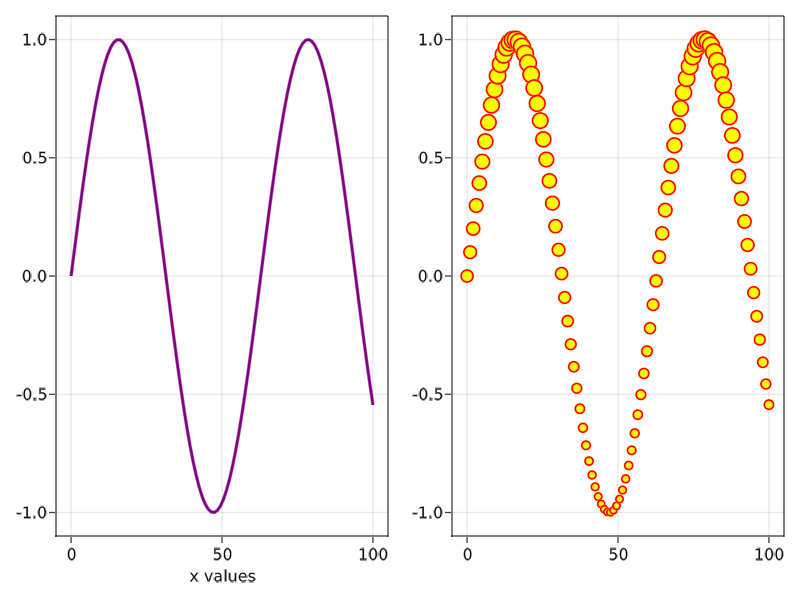

In [12]:
left.xlabel = "x values"

fig

# Monte Carlo simulation (classical FM Ising model)

The Hamiltonian of the Ising model is given by:

$$\large H = -J \sum_{\langle i, j \rangle} s_i s_j.$$

The summation $\langle i, j \rangle$ extends over all pairs of nearest neighbors. We consider the ferromagnetic square lattice $(J>0)$. 

We are interested in thermal expectation value of observables $X$ calculated as:

$$\large \left<X\right> = \frac{1}{Z}\sum_{{\bf s}}e^{-\beta H({\bf s})}X({\bf s}),$$
$$\large Z = \sum_{{\bf s}}e^{-\beta H({\bf s})},$$

here $\bf{s}$ is a microscopic spin configuration and the sum runs over all possible $\bf{s}$. To estimate this value, a Markov Chain Monte Carlo simulation successively generates spin configurations $\mathcal{S}_M = \{{\bf s}_1, \dots {\bf s}_M\}$ such that, in the limit of large $M$, the frequency of a configuration ${\bf s}$ in $\mathcal{S}_M$ is proportional to the Boltzmann distribution $p \propto e^{-\beta H({\bf s})}$. Then the observable can be estimated as:

$$ \large \left<X\right>_{\text{MC}} = \frac{1}{M}\sum_{{\bf s}\in \mathcal{S}_M}X({\bf s}),$$

which approaches to $\left<X\right>$ when $M$ is large enough. In this tutorial we consider the energy $H$, the square of the energy $H^2$, the square of the magnetization $(m_z)^2$ as observables.

### Import necessary packages
`Statistics` will be used for calculating a mean value of observable.

In [13]:
using Statistics

### Define necessary functions

`calc_total_energy`: Function that calculate total energy $H({\bf s})$ for the given spin configuration ${\bf s}$

`spins`: $L\times L$ matrix

`L`: linear length of system

Note that here open boundary condition is considred.

In [14]:
function calc_total_energy(L, spins)
    E = 0.0
    for i in 1:L
        for j in 1:L
            # right bond
            E -= spins[i,j] * spins[mod(i, L) + 1,j]
            # up bond
            E -= spins[i,j] * spins[i,mod(j, L) + 1]
        end
    end
    return E
end;

In the Metoropolis-Hastings algorithm (single spin flip update), the following steps are performed
1. Choose a random site and propose a spin flip at that site (Proposal of a new configuration ${\bf s'}$).
2. Calculate the energy difference $\Delta E = H({\bf s'}) - H({\bf s})$.
3. If $\Delta E < 0 $, accept the proposal. If not, accept the proposal with probability $p = e^{-\beta\Delta E}$.

In [15]:
function ss_update!(beta, L, spins)
    i, j = rand(1:L, 2)
    del_E = 0
    # right bond
    del_E += 2*spins[i,j] * spins[mod(i, L) + 1,j]
    # left bond
    del_E += 2*spins[i,j] * spins[mod(i-2, L) + 1,j]
    # up bond
    del_E += 2*spins[i,j] * spins[i,mod(j, L) + 1]
    # down bond
    del_E += 2*spins[i,j] * spins[i,mod(j-2, L) + 1]
    
    if del_E < 0.0
        spins[i,j] = -1*spins[i,j]
    elseif rand() < exp(-beta * del_E)
        spins[i,j] = -1*spins[i,j]
    end
    return
end;

### Check thermalization
Confirm that the process is approaching steady state.

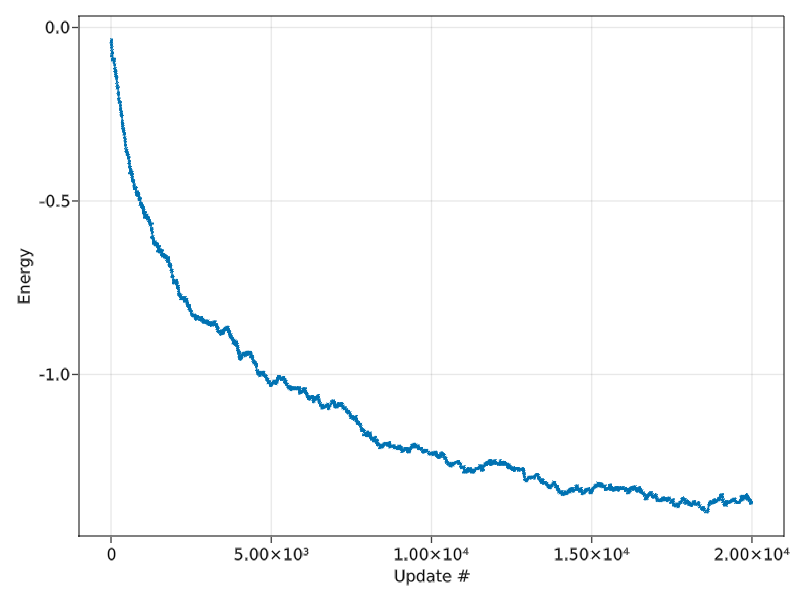

In [16]:
L = 40
beta = 1.0/2.0 # T = 2.0

spins = rand([-1,1],L,L)
therm_enes = zeros(20000)

therm_enes[1] = calc_total_energy(L, spins)
for i in 2:20000
    ss_update!(beta, L, spins)
    therm_enes[i] = calc_total_energy(L, spins)
end

fig, ax, plot = lines(1:20000, therm_enes./(L*L))
ax.xlabel = "Update #"
ax.ylabel = "Energy"

fig

### Define a main function
`mcmc`: peforms a Markov-Chain Monte Carlo simulation for given linear system size $L$ and inverse temperature $\beta$. The number of sampling is set by `MCsteps`.

In [17]:
function mcmc(L, beta, MCsteps)

    # initialize data array with zeros
    enes = zeros(MCsteps)
    ene2s = zeros(MCsteps)
    mz2s = zeros(MCsteps)

    # random initialization of spin configuration
    spins = rand([-1,1],L,L)
    
    # measure observable every L*L single spin flips
    for i in 1:MCsteps
        for _ in 1:L*L
            ss_update!(beta, L, spins)
        end
        enes[i] = calc_total_energy(L, spins)
        ene2s[i] = enes[i]^2
        mz2s[i] = sum(spins)^2/(L^4)
    end
    # discard first 20% Monte Carlo steps as a thermalization process and return average values
    return mean(enes[MCsteps÷5:end]), mean(ene2s[MCsteps÷5:end]), mean(mz2s[MCsteps÷5:end])
end;

### Run a simulation for various $L$ and $T$

In [18]:
Ls = [4,8,12,16] # linear system size
Ts = range(0.5,5.0, length=40) # 40 temperature points from 0.1 to 5.0

# data matrix
enes = zeros(4, 40)
ene2s = zeros(4, 40)
mz2s = zeros(4, 40)

for (i, L) in enumerate(Ls)
    for (j, T) in enumerate(Ts)
        beta = 1/T
        enes[i,j], ene2s[i,j], mz2s[i,j] = mcmc(L, beta, 100000) 
    end
end
       

### Plot the result
Square magnetization $$ (m_z)^2 = \left(\frac{1}{N}\sum_i s_i\right)^2$$

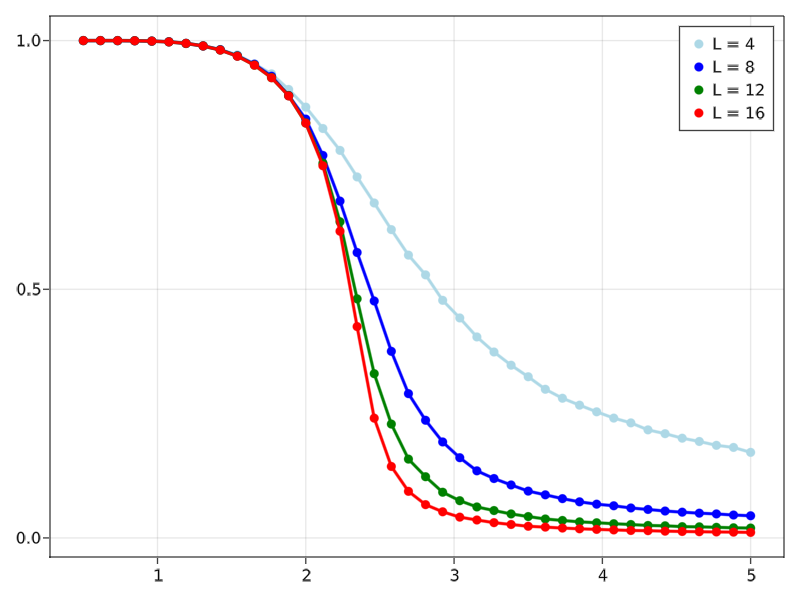

In [19]:
fig = Figure()
axis = Axis(fig[1, 1])
colors = (:lightblue, :blue, :green, :red)
for (i, L) in enumerate(Ls)
    lineplot = lines!(axis, Ts, mz2s[i,:], linewidth = 3, color=colors[i])
    scatterplot = scatter!(axis, Ts, mz2s[i,:], label = "L = $L", color=colors[i])
end

axislegend()

fig

Specific heat is given by
$$ C_V = \frac{1}{N}\frac{\left<E^2\right> - \left<E\right>^2}{T^2} $$

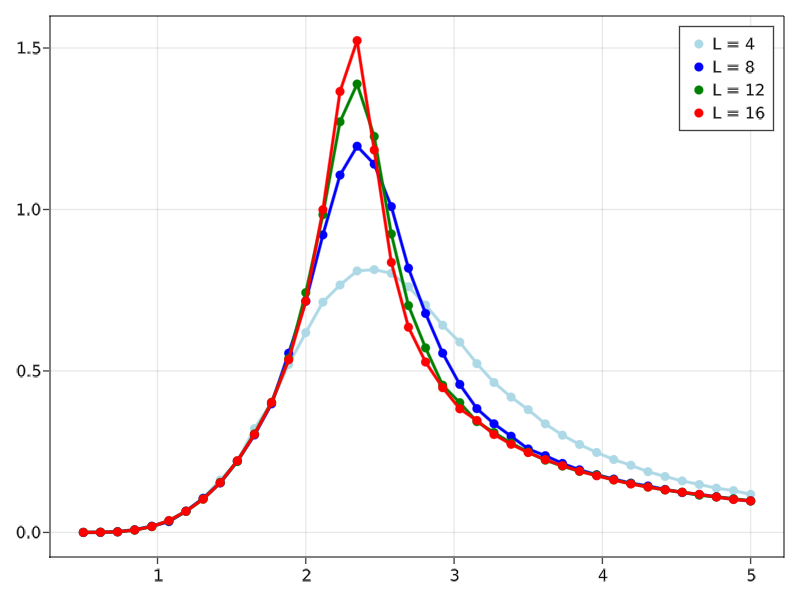

In [20]:
fig = Figure()
axis = Axis(fig[1, 1])
colors = (:lightblue, :blue, :green, :red)
for (i, L) in enumerate(Ls)
    cv = @.((ene2s[i,:] - enes[i,:]^2)/(Ts^2)/(L*L))
    lineplot = lines!(axis, Ts, cv, linewidth = 3, color=colors[i])
    scatterplot = scatter!(axis, Ts, cv, label = "L = $L", color=colors[i])
end

axislegend()

fig

# Output data to file

In [21]:
for (i, L) in enumerate(Ls)
    output = open("out_L$(L).txt", "w")
    for (j, T) in enumerate(Ts)
        write(output, "$(T)\t$(enes[i,j])\t$(ene2s[i,j])\t$(mz2s[i,j])\n") # use tab as a delimiter
    end
    close(output)
end

# Load data from file
`readlm`: Read a matrix from the source where each line (separated by eol) gives one row, with elements separated by the given delimiter. 

In [22]:
using DelimitedFiles
data = readdlm("out_L16.txt", '\t') # tab is used as a delimiter

40×4 Matrix{Float64}:
 0.5       -512.0    262144.0        1.0
 0.615385  -511.996       2.62139e5  0.999991
 0.730769  -511.969  262113.0        0.99994
 0.846154  -511.827       2.61968e5  0.999659
 0.961538  -511.468       2.61604e5  0.998949
 1.07692   -510.693       2.60818e5  0.997384
 1.19231   -509.21        2.59319e5  0.994346
 1.30769   -506.748       2.56839e5  0.989216
 1.42308   -502.929       2.53018e5  0.980994
 1.53846   -497.381       2.47522e5  0.968544
 1.65385   -489.689       2.40008e5  0.950586
 1.76923   -479.414       2.3016e5   0.925296
 1.88462   -465.581       2.17252e5  0.888744
 ⋮                                   
 3.73077   -155.831   25019.5        0.019848
 3.84615   -149.888   23184.7        0.0183476
 3.96154   -144.264   21516.6        0.0171759
 4.07692   -139.151   20054.9        0.0160943
 4.19231   -134.416   18742.1        0.0149736
 4.30769   -130.802   17776.2        0.0145814
 4.42308   -126.35    16624.1        0.0136
 4.53846   -122.776   1

### Plot the data

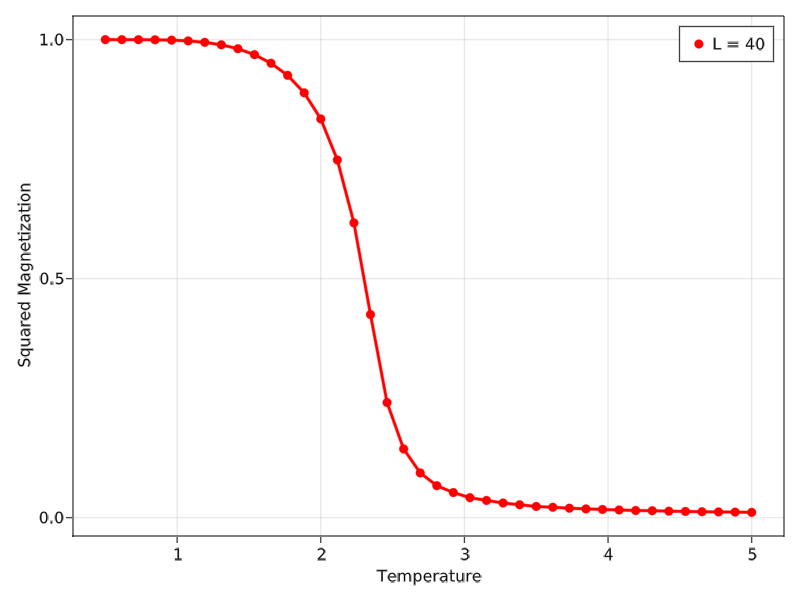

In [23]:
T_file = data[:,1]
mz2_file = data[:,4]
fig = Figure()
ax = Axis(fig[1, 1])
lineplot = lines!(ax, T_file, mz2_file, linewidth = 3, color=:red)
scatterplot = scatter!(ax, T_file, mz2_file, label = "L = $L", color=:red)

ax.xlabel = "Temperature"
ax.ylabel = "Squared Magnetization"
axislegend()

fig

In [24]:
save("sm_L16.png", fig)

GLMakie.Screen(...)